#  Drug Consumption Classification

## Project description


Description

**Task**
- Task

**Work plan**

- 1 Load data
- 2 Data preprocessing
  - 2.1 ...
- 3 Exploratory data analysis
  - 3.1 ...
- 4 Correlation data analysis
- 5 Training and comparison of models
  - 5.1 Samples
  - 5.2 Model training
    - 5.2.1 ...
  - 5.3 Best model
- 6 Results of the work
  - 6.1 Description of tasks
  - 6.2 Description of work steps
  - 6.3 Final conclusion

**Description of data**

The data consists of several files obtained from different sources:
- `data.csv` - ... .



File `data.csv`:
- `column` - description;
- `target` - ... (*target*).

## Load data


Load needed libraries 


In [2]:
%pip install --upgrade scikit-learn
%pip install lightgbm
%pip install phik
%pip install catboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\dmitr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\dmitr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\dmitr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Import libraries


In [55]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc as sklearn_auc, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier

from phik.report import plot_correlation_matrix

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



Settings 


In [5]:
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


Constants

In [10]:
RANDOM_STATE = 42 
TEST_SIZE = 0.25

Store data in dataframe 

In [18]:
data = pd.read_csv("../datasets/drug_consumption.csv", index_col=['ID'])

Look at general information about each dataframe

In [19]:
data.info()
data.sample(5, random_state=RANDOM_STATE)

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack      18

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310,0.49788,-0.48246,1.16365,0.96082,-0.31685,-0.79151,0.16767,-0.17779,0.59042,0.41594,-1.37983,-2.07848,CL6,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
385,1.09449,0.48246,0.45468,0.96082,-0.31685,0.13606,-0.30033,-0.45174,1.11406,0.75830,-2.55524,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
465,-0.95197,0.48246,0.45468,0.96082,-0.31685,0.31287,-0.80615,1.06238,0.76096,0.93949,0.19268,-0.21575,CL5,CL2,CL2,CL3,CL5,CL3,CL5,CL0,CL0,CL2,CL0,CL0,CL2,CL3,CL3,CL3,CL6,CL0,CL0
1745,1.82213,0.48246,-0.61113,0.96082,-0.31685,-0.46725,-0.94779,-1.42424,0.43852,-0.00665,-0.71126,-0.52593,CL3,CL0,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
921,-0.95197,-0.48246,-1.22751,0.24923,-0.31685,0.22393,1.45421,2.15324,-0.30172,-1.01450,1.86203,1.92173,CL6,CL4,CL2,CL3,CL6,CL6,CL4,CL5,CL0,CL5,CL5,CL4,CL3,CL5,CL3,CL5,CL6,CL0,CL0


## Data preprocessing 

According to data specification, create a new datframe with transformed values. It will make data more understandable for analysis 

In [35]:
# Age
data_transformed = data.copy()
age_col = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }
data_transformed['Age'] = data_transformed['Age'].replace(age_col)

# Country

country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
data_transformed['Country'] = data_transformed['Country'].replace(country_col)

# Gender
gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
data_transformed['Gender'] = data_transformed['Gender'].replace(gender_col)

# Education
education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College',
            -0.05921: 'Professional Certificate',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
data_transformed['Education'] = data_transformed['Education'].replace(education_col)

# Ethnicity
ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
data_transformed['Ethnicity'] = data_transformed['Ethnicity'].replace(ethnicity_col)

# Usage
usage_col = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }
data_transformed['Alcohol'] = data_transformed['Alcohol'].replace(usage_col)
data_transformed['Amphet'] = data_transformed['Amphet'].replace(usage_col)
data_transformed['Amyl'] = data_transformed['Amyl'].replace(usage_col)
data_transformed['Benzos'] = data_transformed['Benzos'].replace(usage_col)
data_transformed['Caff'] = data_transformed['Caff'].replace(usage_col)
data_transformed['Cannabis'] = data_transformed['Cannabis'].replace(usage_col)
data_transformed['Choc'] = data_transformed['Choc'].replace(usage_col)
data_transformed['Coke'] = data_transformed['Coke'].replace(usage_col)
data_transformed['Crack'] = data_transformed['Crack'].replace(usage_col)
data_transformed['Ecstasy'] = data_transformed['Ecstasy'].replace(usage_col)
data_transformed['Heroin'] = data_transformed['Heroin'].replace(usage_col)
data_transformed['Ketamine'] = data_transformed['Ketamine'].replace(usage_col)
data_transformed['Legalh'] = data_transformed['Legalh'].replace(usage_col)
data_transformed['LSD'] = data_transformed['LSD'].replace(usage_col)
data_transformed['Meth'] = data_transformed['Meth'].replace(usage_col)
data_transformed['Mushrooms'] = data_transformed['Mushrooms'].replace(usage_col)
data_transformed['Nicotine'] = data_transformed['Nicotine'].replace(usage_col)
data_transformed['Semer'] = data_transformed['Semer'].replace(usage_col)
data_transformed['VSA'] = data_transformed['VSA'].replace(usage_col)

del age_col, country_col, gender_col, education_col, ethnicity_col, usage_col

In [32]:
data_transformed.sample(5, random_state=RANDOM_STATE)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310,35 - 44,Male,Masters Degree,UK,White,-0.79151,0.16767,-0.17779,0.59042,0.41594,-1.37983,-2.07848,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Used in Last Day,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used
385,45 - 54,Female,University Degree,UK,White,0.13606,-0.30033,-0.45174,1.11406,0.75830,-2.55524,-0.52593,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Used in Last Day,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used
465,18-24,Female,University Degree,UK,White,0.31287,-0.80615,1.06238,0.76096,0.93949,0.19268,-0.21575,Used in Last Week,Used in Last Decade,Used in Last Decade,Used in Last Year,Used in Last Week,Used in Last Year,Used in Last Week,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Used in Last Decade,Used in Last Year,Used in Last Year,Used in Last Year,Used in Last Day,Never Used,Never Used
1745,55 - 64,Female,"Some College,No Certificate Or Degree",UK,White,-0.46725,-0.94779,-1.42424,0.43852,-0.00665,-0.71126,-0.52593,Used in Last Year,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used
921,18-24,Male,Left School at 18 years,Canada,White,0.22393,1.45421,2.15324,-0.30172,-1.01450,1.86203,1.92173,Used in Last Day,Used in Last Month,Used in Last Decade,Used in Last Year,Used in Last Day,Used in Last Day,Used in Last Month,Used in Last Week,Never Used,Used in Last Week,Used in Last Week,Used in Last Month,Used in Last Year,Used in Last Week,Used in Last Year,Used in Last Week,Used in Last Day,Never Used,Never Used


## Exploratory data analysis


### Functions

In [36]:
# Function for describing categorical data
def categorical_analysis(data, target=None, width=15, height=5, show_percent=True):
    categorical_columns = data.select_dtypes(include=['object', 'category', 'datetime64']).columns
    n_cols = 2
    n_rows = (len(categorical_columns) + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, n_rows * height))
    axes = axes.ravel()

    for i, column in enumerate(categorical_columns):
        # Selection of the 10 most popular categories
        top_categories = data[column].value_counts().nlargest(10).index

        if target is not None:
            # Filtering data by target variable and selecting categories
            data_target_1 = data[data[target] == 1]
            data_target_0 = data[data[target] == 0]

            # Draw a graph for target == 1
            ax = sns.countplot(x=column, data=data_target_0[data_target_0[column].isin(top_categories)],
                               color='blue', alpha=0.5, label='Target 0', order=top_categories, ax=axes[i])

            # Draw a graph for target == 0 on top of the first
            sns.countplot(x=column, data=data_target_1[data_target_1[column].isin(top_categories)],
                          color='red', alpha=0.5, label='Target 1', order=top_categories, ax=ax)

            axes[i].legend()
        else:
            # Draw a regular distribution graph if target is not specified
            ax = sns.countplot(x=column, data=data[data[column].isin(top_categories)],
                               palette="Set2", order=top_categories, ax=axes[i])

        # Add percentage if specified
        if show_percent:
            total = len(data[column])
            for p in ax.patches:
                percentage = f'{100 * p.get_height() / total:.1f}%'
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='center', size=10, xytext=(0, 8),
                            textcoords='offset points')

        # General settings for all charts
        unique_categories = data[column].nunique()
        degree = 30 if unique_categories > 4 else 0
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_ylabel('Number of values')
        axes[i].set_xlabel('Category')
        axes[i].tick_params(axis='x', rotation=degree)

    plt.tight_layout()
    plt.show()



# Function for describing quantitative data
def numerical_analysis(data, target=None, bins=30, kde=True, width=15, height=5):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    n_cols = 2 if target is None else 3
    n_rows = len(numerical_columns)


    if target:
        print(f'Target 1:{data[data[target] == 1][numerical_columns].describe()}\n')
        print(f'Target 0:{data[data[target] == 0][numerical_columns].describe()}')
    else:
        print(data[numerical_columns].describe())

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, n_rows * height / 2))
    axes = axes.ravel()

    for i, column in enumerate(numerical_columns):
        if target is not None:
            # Dividing data by target variable
            data_target_1 = data[data[target] == 1]
            data_target_0 = data[data[target] == 0]

            # Histograms for target == 1 and target == 0
            sns.histplot(data_target_0[column], kde=kde, bins=bins, color='blue', alpha=0.5, label='Target 0', ax=axes[i*n_cols])
            sns.histplot(data_target_1[column], kde=kde, bins=bins, color='red', alpha=0.5, label='Target 1', ax=axes[i*n_cols])
            axes[i*n_cols].legend()

            # Boxplots for target == 1 and target == 0
            sns.boxplot(x=column, data=data_target_0, color='blue', ax=axes[i*n_cols + 1])
            sns.boxplot(x=column, data=data_target_1, color='red', ax=axes[i*n_cols + 2])

            axes[i*n_cols].set_title(f'Histogram for {column} by Target')
            axes[i*n_cols + 1].set_title(f'Boxplot for {column} (Target 1)')
            axes[i*n_cols + 2].set_title(f'Boxplot for {column} (Target 0)')
        else:
            # Standard histograms and whisker boxes if target is not specified
            sns.histplot(data[column], kde=kde, bins=bins, ax=axes[i*2])
            axes[i*2].set_title(f'Histogram for {column} column')
            sns.boxplot(x=data[column], ax=axes[i*2 + 1])
            axes[i*2 + 1].set_title(f'Boxplot for {column} column')

        for j in range(i*n_cols, i*n_cols + n_cols):
            axes[j].set_ylabel('Quantity')
            axes[j].set_xlabel('Value')

    plt.tight_layout()
    plt.show()


### Categorical features


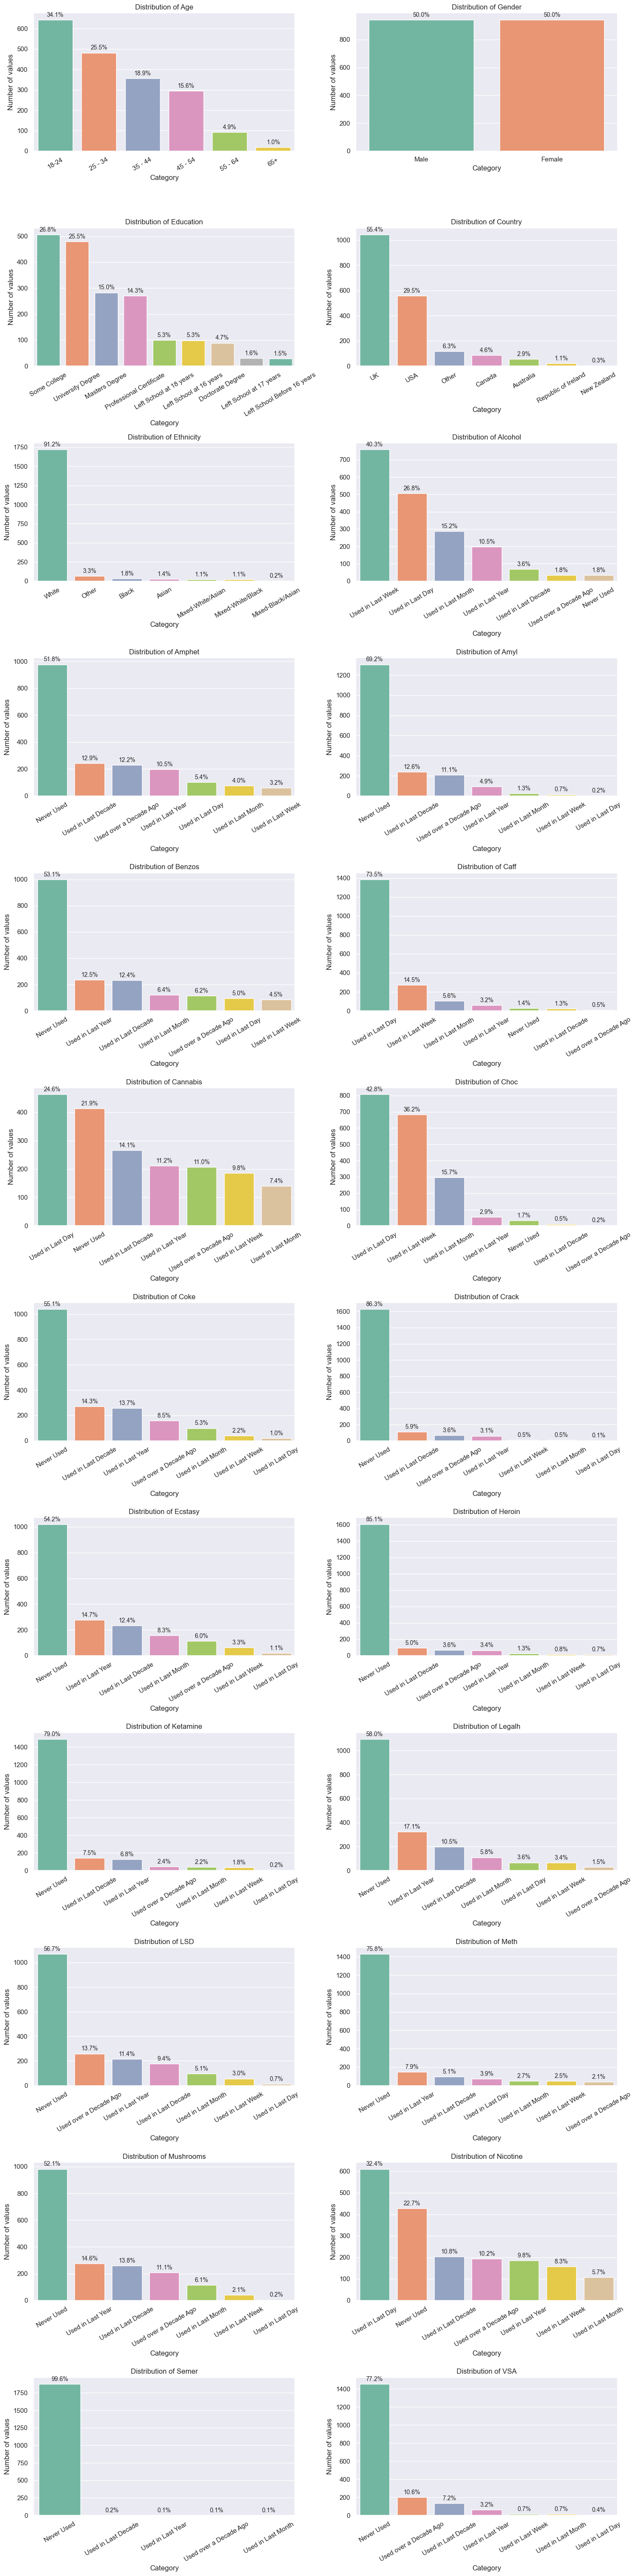

In [37]:
categorical_analysis(data_transformed)

### Numerical features

            Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1885.000000  1885.000000  
mean      0.007216    -0.003292  
std       0.954435     0.963701  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730  


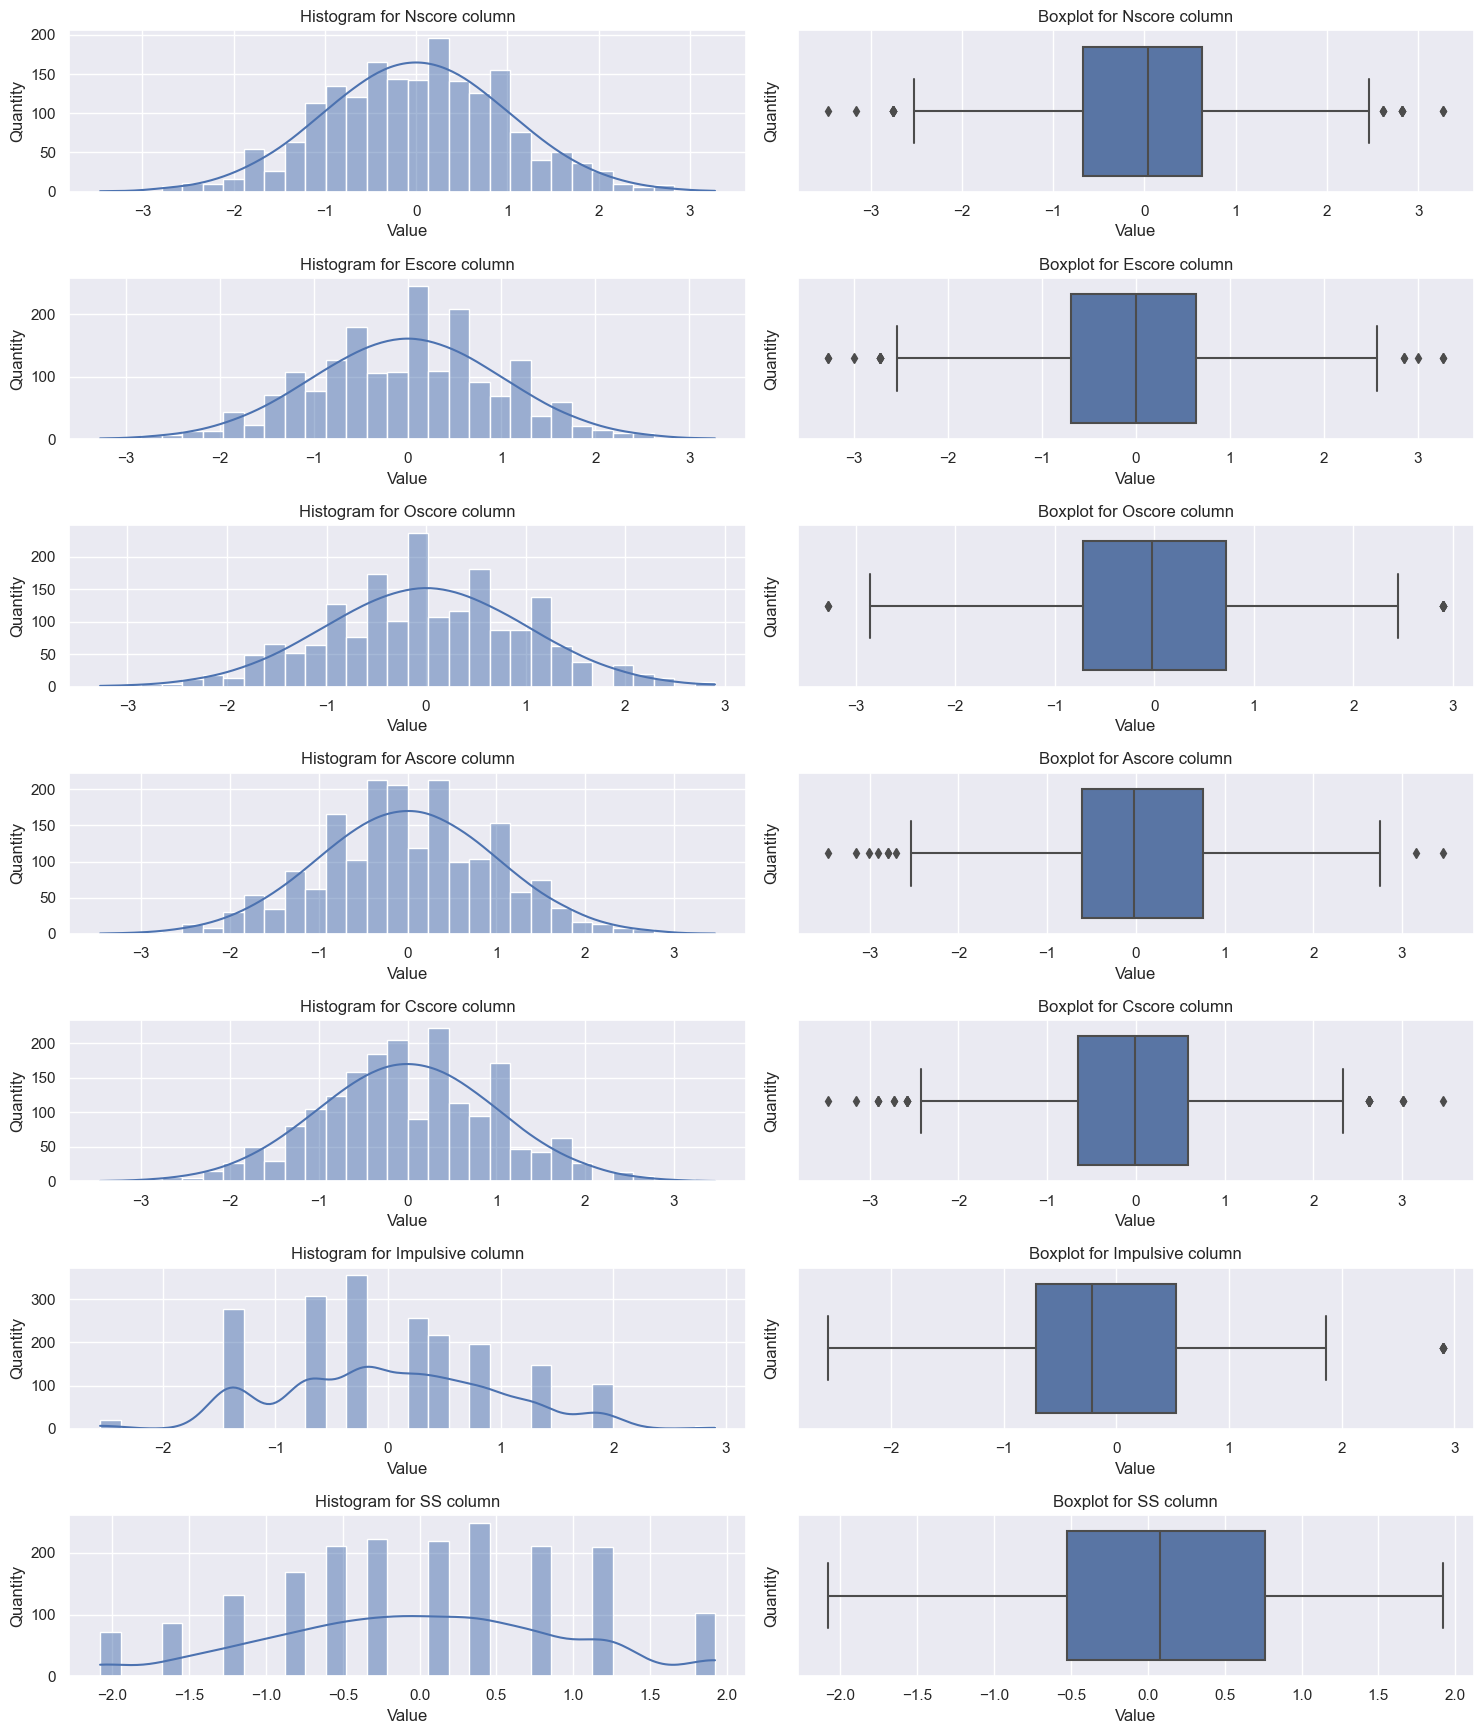

In [38]:
numerical_analysis(data_transformed)

## Correlation data analysis 

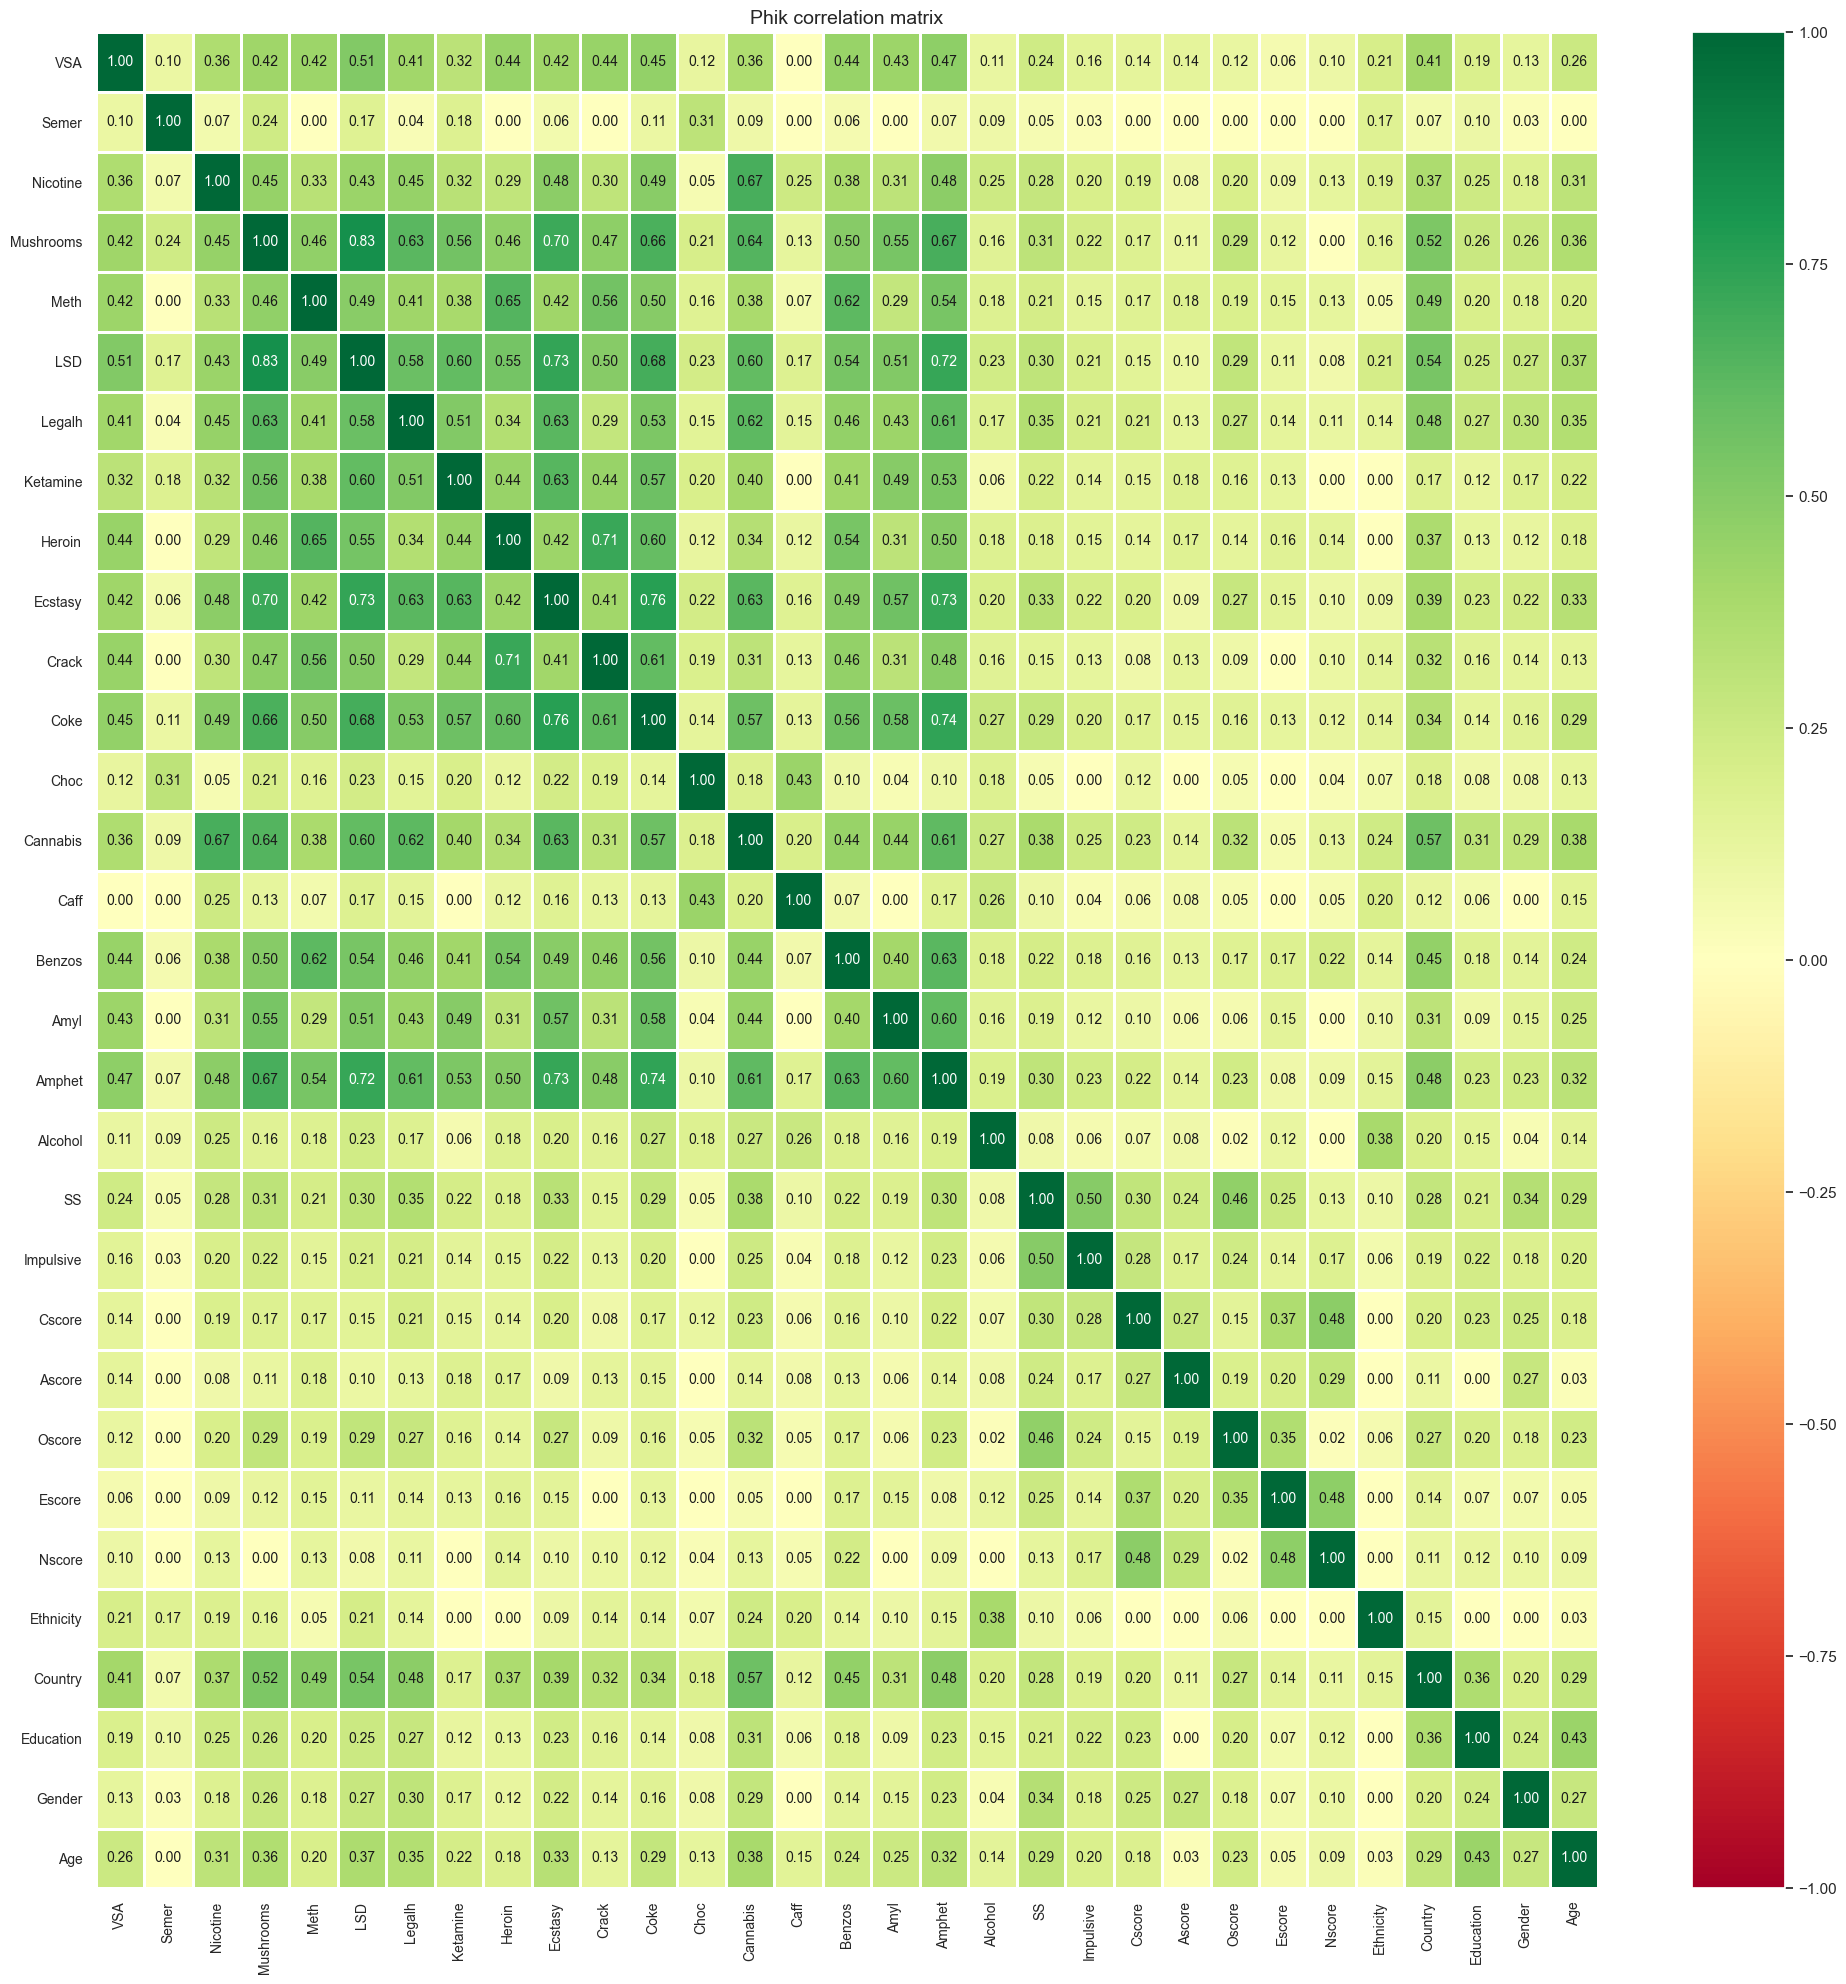

In [43]:
interval_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

phik_overview = data_transformed.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    title='Phik correlation matrix',
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 20)
)


In [44]:
del data_transformed

## Training and comparison of models

In [52]:
targets = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

In [54]:
accuracy_results = {}
f1_results = {}

In [56]:
for target in targets:
    
    X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                                                            'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
                                                            'Impulsive', 'SS']], data[target], test_size=0.20, random_state=2024, stratify=data[target])
    model = LogisticRegression(max_iter=100000, tol=1e-12).fit(X=X_train, y=y_train)
    f1_results[target] = f1_score(y_true=y_test, y_pred=model.predict(X=X_test), average='weighted')
    accuracy_results[target] = accuracy_score(y_true=y_test, y_pred=model.predict(X=X_test))



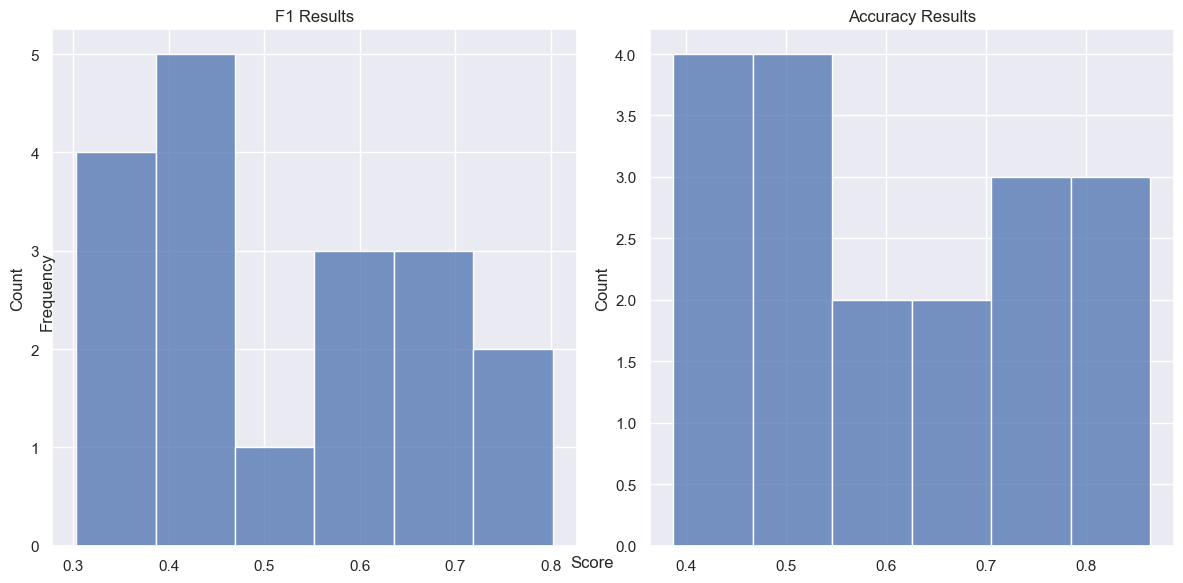

## Conclusions